<a href="https://colab.research.google.com/github/Jtandoh01/Disease-Prediction-ML-DCIT311/blob/final/End_of_semester_project_DCIT313.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Library Imports

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data = pd .read_csv("./diabetes.csv")


# Data Preprocessing


In [ ]:
print(data.columns)
print(data.shape)
print(data.dtypes )
print(data.isnull().values.sum())
print(data.describe().T)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
(2000, 9)
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
0
                           count       mean         std     min     25%  \
Pregnancies               2000.0    3.70350    3.306063   0.000   1.000   
Glucose                   2000.0  121.18250   32.068636   0.000  99.000   
BloodPressure             2000.0   69.14550   19.188315   0.000  63.500   
SkinThickness             2000.0   20.93500   16.103243   0.000   0.000   
Insulin                   2000.0   80.25400  111.180534   0.000   0.000   
BMI                       2000.0   32.1

# Getting the Feature and the Target Variable from the Dataset

In [ ]:
features = data.iloc[:,:-1]
target = data.iloc[:,-1].values
print(features.shape)
print(target.shape)

(2000, 8)
(2000,)


# Visualizing the features to find possible outliers and check for nature of the dataset

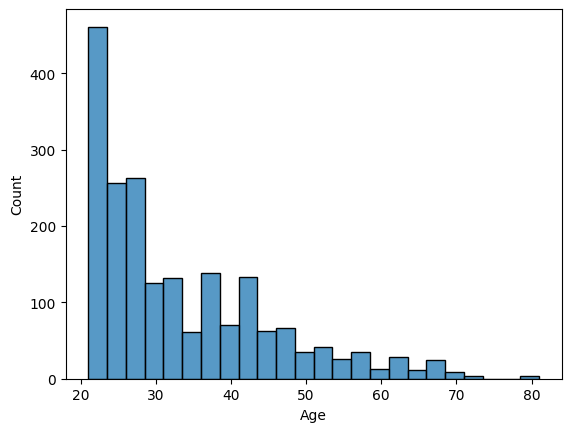

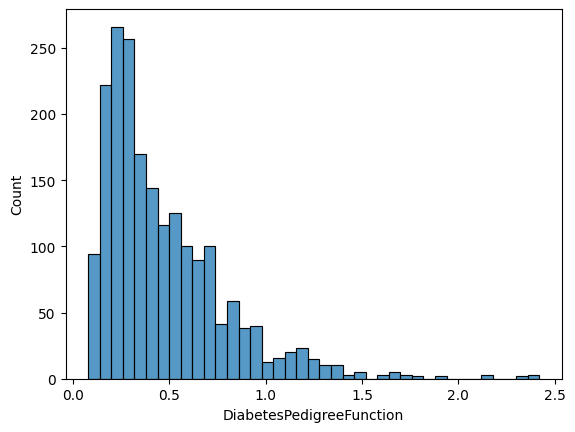

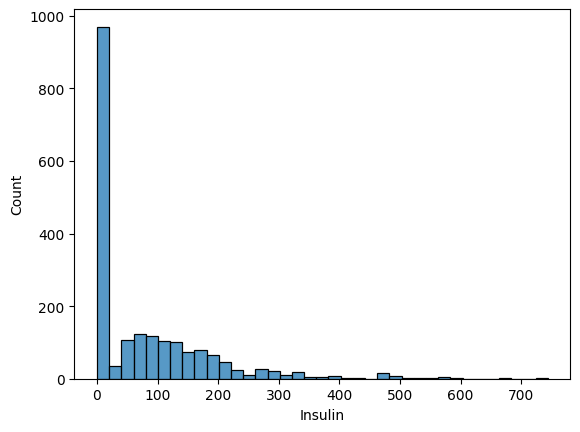

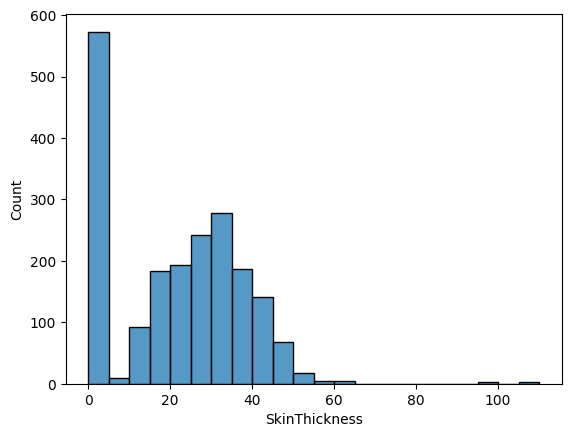

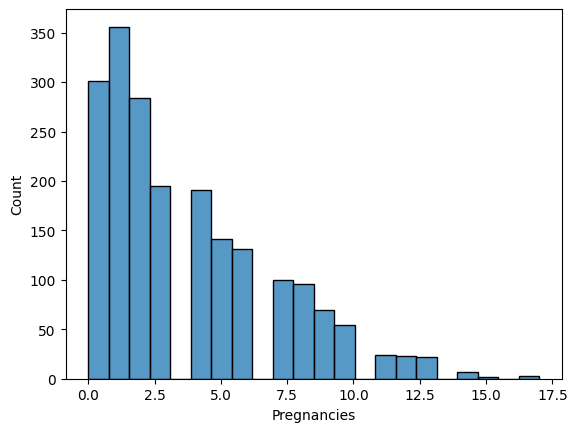

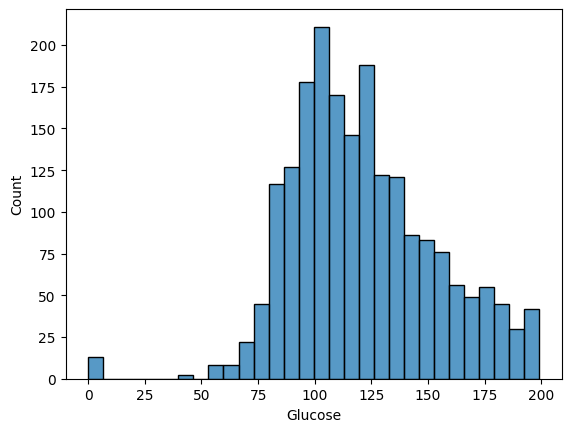

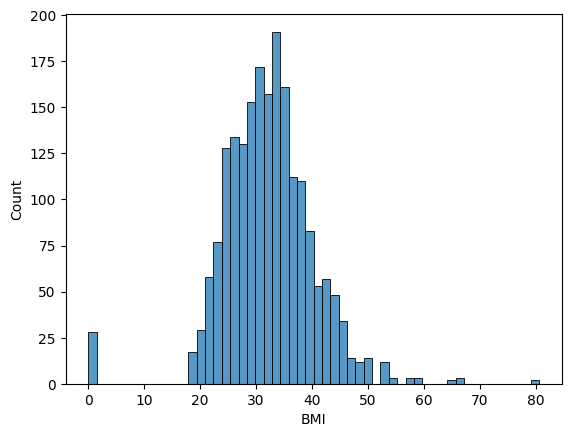

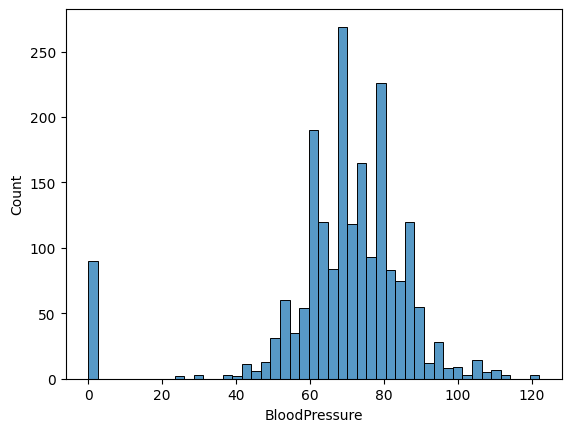

In [ ]:
sns.histplot(data=data,x='Age')
plt.show()

sns.histplot(data=data,x ='DiabetesPedigreeFunction')
plt.show()

sns.histplot(data=data,x ='Insulin')
plt.show()

sns.histplot(data=data, x="SkinThickness")
plt.show()
sns.histplot(data= data, x= 'Pregnancies')
plt.show()
sns.histplot(data =data, x = 'Glucose')
plt.show()
sns.histplot(data =data, x = 'BMI')
plt.show()
sns.histplot(data =data, x = 'BloodPressure')
plt.show()

# Replacing zero values of the features: BMI, BloodPressure, Insulin, Glucose and SkinThickness with different strategies

In [ ]:
from sklearn.impute import SimpleImputer

features_and_strategy={
    'Glucose': 'mean',
    'Insulin': 'mean',
    'BMI': 'mean',
    'SkinThickness': 'median',
    'BloodPressure': 'median'
}

for column,strategy in features_and_strategy.items():
  features[column].replace(0,inplace=True)
  imputer = SimpleImputer(strategy=strategy)
  features[column] = imputer.fit_transform(features[[column]])

In [ ]:

zero_values_check = features[features_and_strategy.keys()].eq(0).sum()
print("Zero values after replacement:")
print(zero_values_check)

Zero values after replacement:
Glucose          0
Insulin          1
BMI              0
SkinThickness    0
BloodPressure    0
dtype: int64


# Revisualizing features after zero value replacement

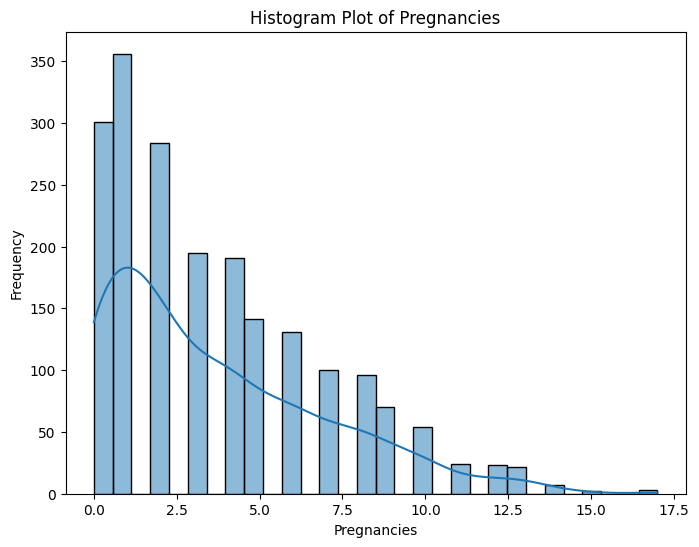

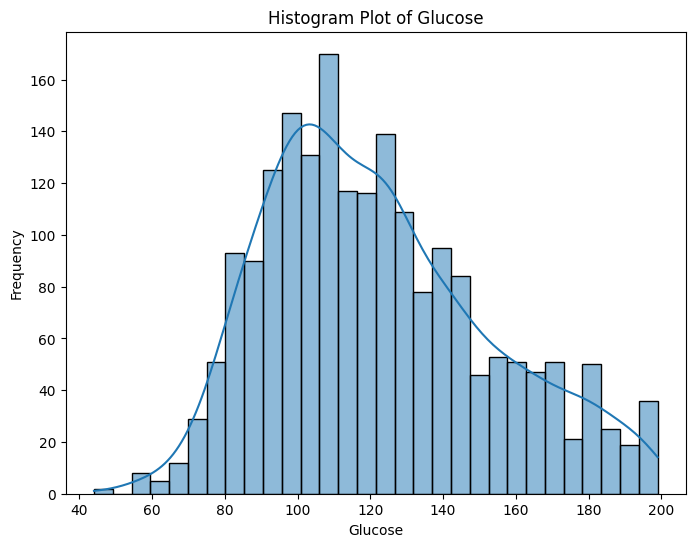

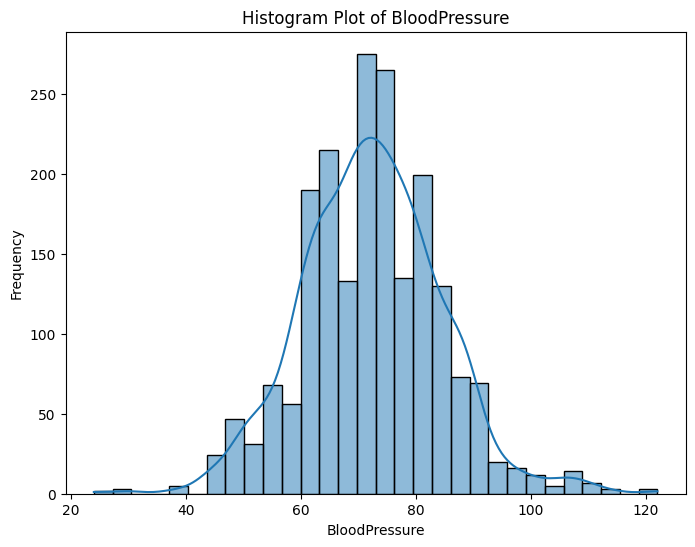

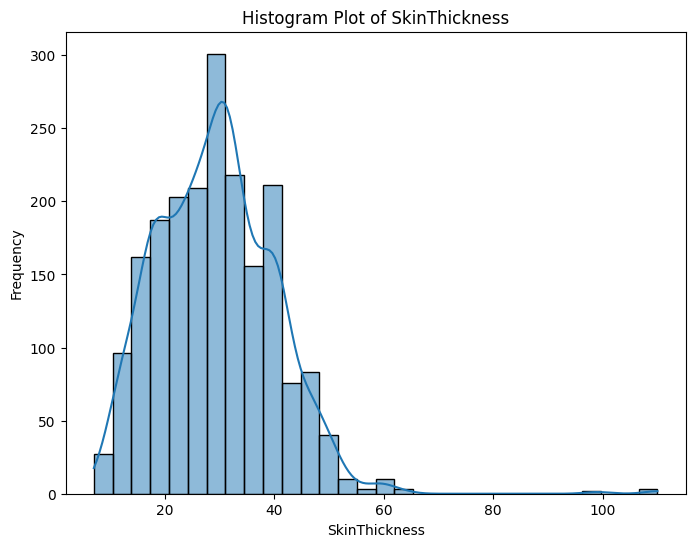

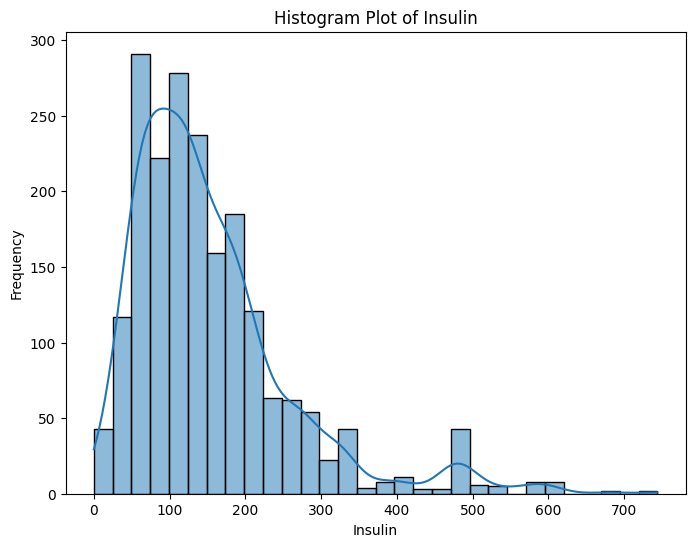

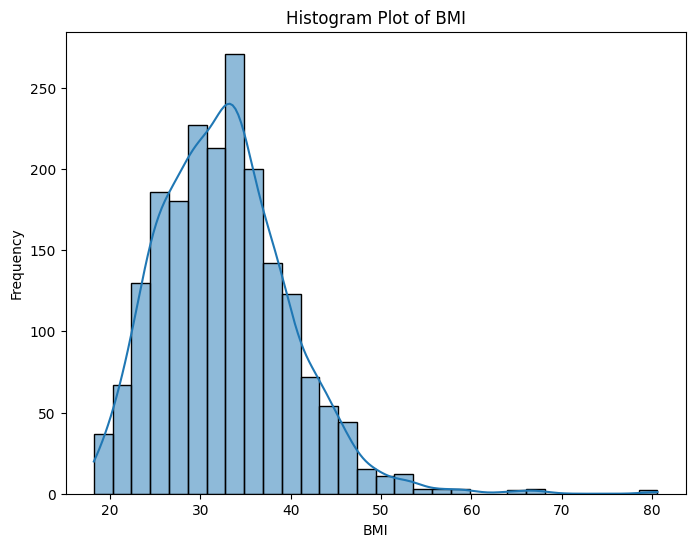

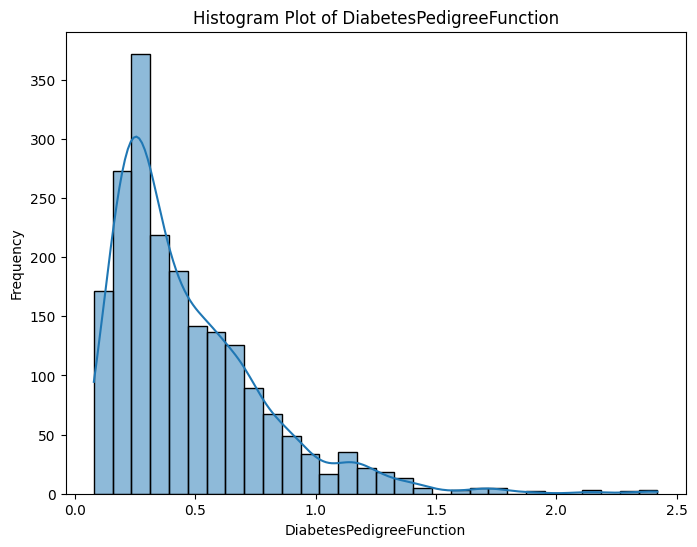

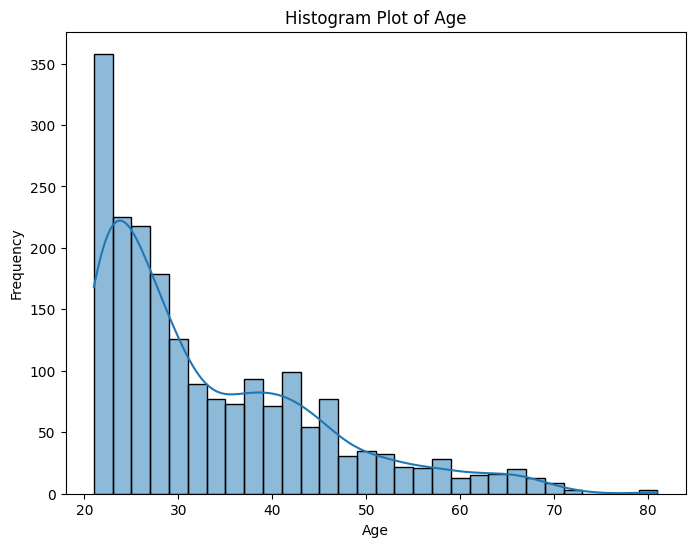

In [ ]:
features_to_visualize = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

for column in features_to_visualize:
  plt.figure(figsize=(8, 6))
  sns.histplot(features[column], bins=30,kde=True)
  plt.title(f'Histogram Plot of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()

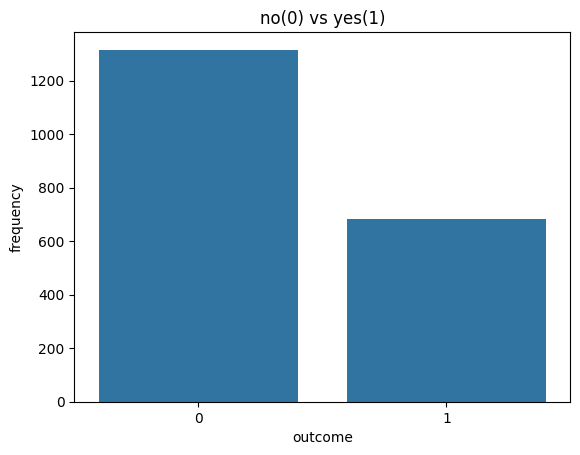

In [ ]:
sns.countplot(data= data, x='Outcome')
plt.xlabel("outcome")
plt.ylabel("frequency")
plt.title("no(0) vs yes(1)")
plt.show()


# Fixing Issues Data Inbalance with SMOTETomek technique

In [ ]:
from imblearn.combine import SMOTETomek
smtk = SMOTETomek(random_state=42)
features_resampled,target_resampled = smtk.fit_resample(features,target)
print(features_resampled.shape, target_resampled.shape)
print(type(target_resampled))
print(type(features_resampled))

(2632, 8) (2632,)
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


# Converting the resampled target data to a pandas DataFrame

In [ ]:
target_resampled = pd.DataFrame(data=target_resampled,columns=['target_resampled'])
print(type(target_resampled))

<class 'pandas.core.frame.DataFrame'>


# Combining sampled features and target into a new dataset

In [ ]:
resampled_data = pd.concat([features_resampled,target_resampled],axis=1)

In [ ]:
features_resampled = resampled_data.iloc[:,:-1]
target_resampled = resampled_data.iloc[:,-1]
feature_to_drop = 'Insulin'
features = features.drop(feature_to_drop,axis=1)
features_resampled = features_resampled.drop(feature_to_drop,axis=1)

#Visualizing original dataset target and sampled dataset target variables side by side.

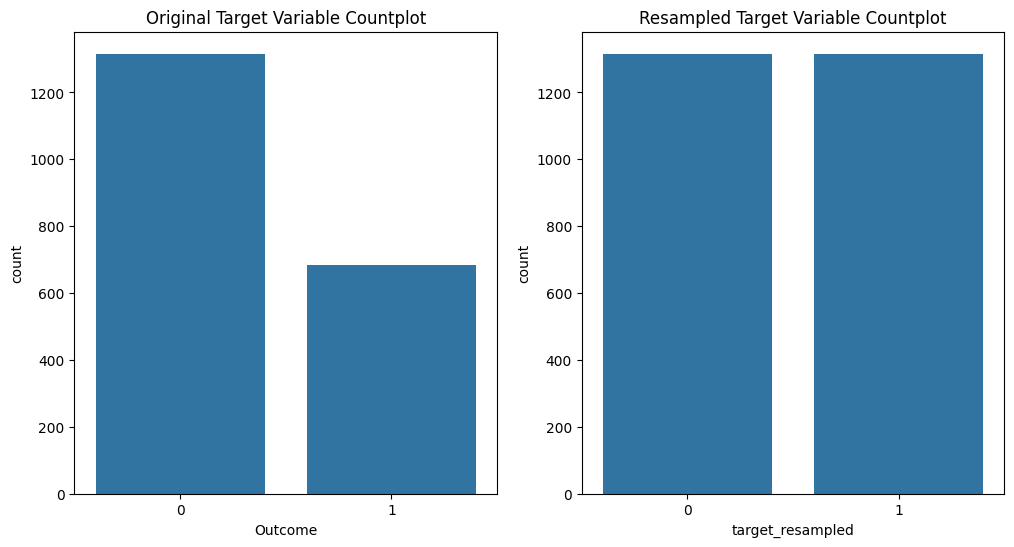

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Outcome', data=data)
plt.title('Original Target Variable Countplot')

plt.subplot(1, 2, 2)
sns.countplot(x='target_resampled', data=resampled_data)
plt.title('Resampled Target Variable Countplot')
plt.show()

# Creation of cross validator object

In [ ]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5)

# Train-Test Split for Original Dataset and Resampled Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(features_resampled, target_resampled, test_size=0.2, random_state=42,stratify=target_resampled)

# Using pearson's correlation coefficient to find the correlation between features

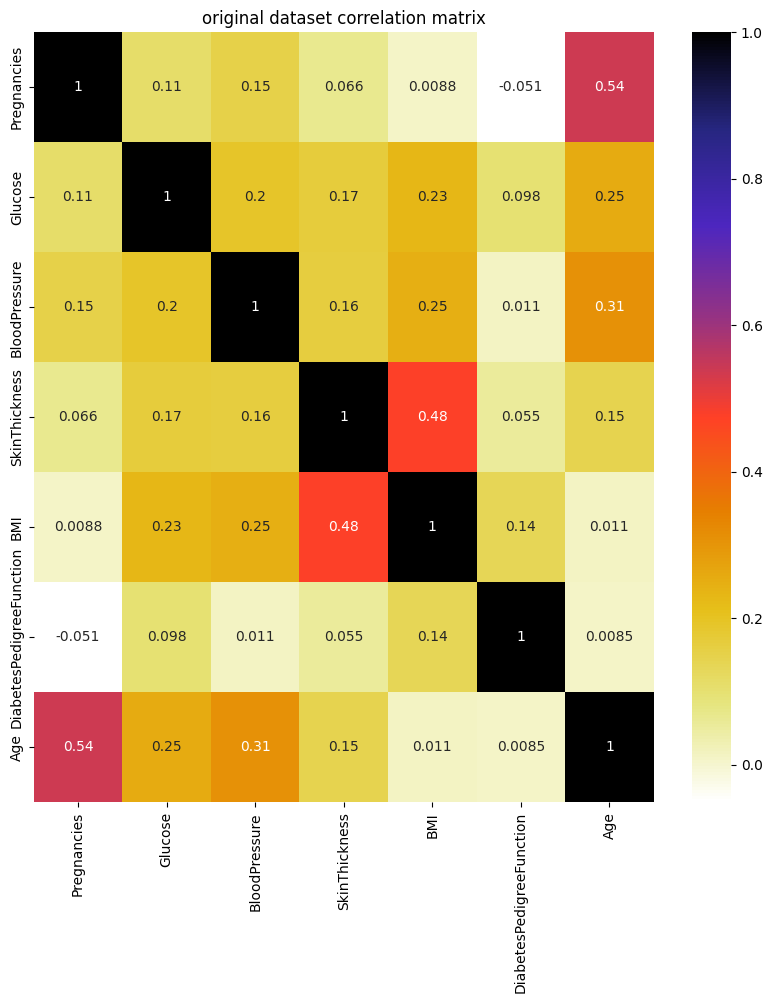

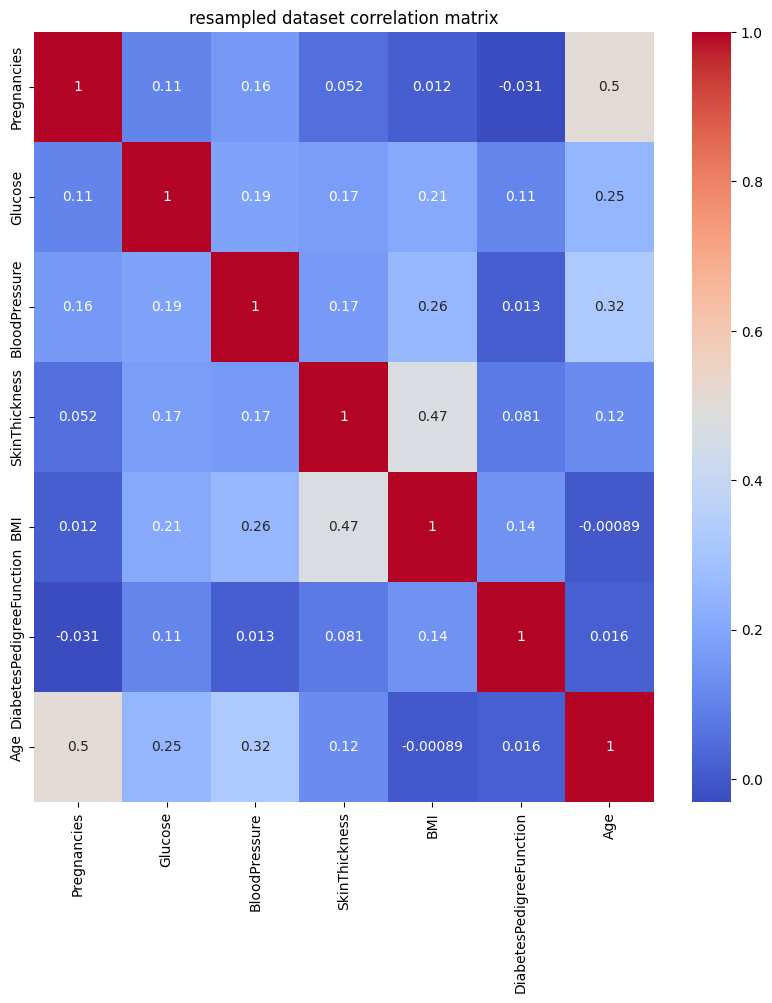

In [ ]:
X_train.corr()
plt.figure(figsize=(10,10))
correlation = X_train.corr()
sns.heatmap(correlation, annot=True, cmap=plt.cm.CMRmap_r)
plt.title('original dataset correlation matrix')
plt.show()

X_train_res.corr()
plt.figure(figsize=(10,10))
correlation = X_train_res.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('resampled dataset correlation matrix')
plt.show()

# Feature Selection ,Feature Scaling And Model Building. All The Pipeline Interface

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,f1_score

# 1. Support Vector Classifier

In [102]:
from sklearn.svm import SVC
model_svc = Pipeline([
    ('StandardScaler', StandardScaler()),
    ('SelectKBest', SelectKBest(score_func=mutual_info_classif)),
    ('SVC', SVC())
])


# A parameter list to pass to GridSearch Cross Validator

In [103]:
C_options = [0.1, 1, 10,100]
K_options = [3, 4, 5]
gamma = [0.001,0.01,0.1]
kernels = ['poly', 'rbf']

param_grid = [
    {
        'SelectKBest__k': K_options,
        'SVC__C': C_options,
        'SVC__kernel':kernels,
        "SVC__gamma":gamma

    },
]

# Gridsearch CV takes model, parameter list,KFold cross validator as parameters

In [106]:

search_grid_svc = GridSearchCV(estimator = model_svc,param_grid=param_grid, cv= cv, scoring='accuracy')

# Fitting The TRAIN set of sampled dataset to the GridSearchCV object to find the optimal hyperparameters, cross validation scores and most optimal model

In [107]:
search_grid_svc.fit(X_train_res,y_train_res)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('StandardScaler', StandardScaler()),
                                       ('SelectKBest',
                                        SelectKBest(score_func=<function mutual_info_classif at 0x7948b92ee290>)),
                                       ('SVC', SVC())]),
             param_grid=[{'SVC__C': [0.1, 1, 10, 100],
                          'SVC__gamma': [0.001, 0.01, 0.1],
                          'SVC__kernel': ['poly', 'rbf'],
                          'SelectKBest__k': [3, 4, 5]}],
             scoring='accuracy')

# Cross Validaton Results, Best Hyperparameters and Best estimator from GridSearchCV

In [108]:
best_params = search_grid_svc.best_params_
average_score = np.mean(search_grid_svc.cv_results_['mean_test_score'])

print("Best Hyperparameters:", best_params)
print("Cross validator mean test score:", average_score)

optimal_model_svc = search_grid_svc.best_estimator_



Best Hyperparameters: {'SVC__C': 100, 'SVC__gamma': 0.1, 'SVC__kernel': 'rbf', 'SelectKBest__k': 5}
Cross validator mean test score: 0.6429202955925047


# Fitting Resampled Data to optimal model

In [109]:
optimal_model_svc.fit(X_train_res,y_train_res).score(X_train_res,y_train_res)

0.867458432304038

# Testing model on resampled test data and original test data

In [110]:
y_pred = optimal_model_svc.predict(X_test)
y_pred_res = optimal_model_svc.predict(X_test_res)

# Metrics

In [111]:

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix for SVC on original dataset: \n{}".format(cm))

acc = classification_report(y_test,y_pred, labels=[0,1])
print("\nClassification report for SVC on original dataset: \n{}".format(acc))


Confusion matrix for SVC on original dataset: 
[[215  48]
 [ 17 120]]

Classification report for SVC on original dataset: 
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       263
           1       0.71      0.88      0.79       137

    accuracy                           0.84       400
   macro avg       0.82      0.85      0.83       400
weighted avg       0.85      0.84      0.84       400



In [113]:

cm = confusion_matrix(y_test_res,y_pred_res)
print("\nConfusion matrix for SVC on sampled dataset: \n{}".format(cm))

acc = classification_report(y_test_res,y_pred_res, labels=[0,1])
print("\nClassification report for SVC on sampled dataset: \n{}".format(acc))


Confusion matrix for SVC on sampled dataset: 
[[218  46]
 [ 32 231]]

Classification report for SVC on sampled dataset: 
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       264
           1       0.83      0.88      0.86       263

    accuracy                           0.85       527
   macro avg       0.85      0.85      0.85       527
weighted avg       0.85      0.85      0.85       527



# 2. K-Nearest Neighbours


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train_res, y_train_res)

params = {
    "selectkbest__k": range(1,7,2),
    "classifier__n_neighbors": range(3,15, 2),
    "classifier__weights": ["uniform", "distance"],
    "classifier__metric": ["minkowski", "manhattan", "euclidean"],
    "classifier__leaf_size": range(1,50,5)
}

In [ ]:
model_knn = Pipeline([
    ('StandardScaler', StandardScaler()),
    ('selectkbest', SelectKBest(score_func=mutual_info_classif)),
    ('classifier', KNeighborsClassifier()),
])
search_grid_knn = GridSearchCV(estimator= model_knn, param_grid= params, cv = cv, scoring= "accuracy", error_score='raise')

In [ ]:
search_grid_knn.fit(X_train_res,y_train_res)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise',
             estimator=Pipeline(steps=[('StandardScaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function mutual_info_classif at 0x7948b92ee290>)),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__leaf_size': range(1, 50, 5),
                         'classifier__metric': ['minkowski', 'manhattan',
                                                'euclidean'],
                         'classifier__n_neighbors': range(3, 15, 2),
                         'classifier__weights': ['uniform', 'distance'],
                         'selectkbest__k': range(1, 7, 2)},
             scoring='accuracy')

# Cross Validation Results

In [ ]:
best_param_knn =  search_grid_knn.best_params_
average_score = np.mean(search_grid_knn.cv_results_['mean_test_score'])

print("Best Hyperparameters for KNN classifier:",best_param_knn)
print("Average mean test score for GridSCV: ",average_score)

Best Hyperparameters for KNN classifier: {'classifier__leaf_size': 6, 'classifier__metric': 'manhattan', 'classifier__n_neighbors': 7, 'classifier__weights': 'distance', 'selectkbest__k': 5}
Average mean test score for GridSCV:  0.8204077593032463


# Optimal KNN Classifier

In [ ]:
optimal_model_knn = search_grid_knn.best_estimator_

optimal_model_knn.fit(X_train_res,y_train_res).score(X_train_res,y_train_res)


1.0

In [ ]:
y_pred_knn = optimal_model_knn.predict(X_test)
print("Kneighbor classifier calssification report(original data):\n{}".format(classification_report(y_test,y_pred_knn,labels=[0,1])))
print("Kneighbor classifier confusion matrix(original data):\n{}".format(confusion_matrix(y_test,y_pred_knn)))

Kneighbor classifier calssification report(original data):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       263
           1       0.96      1.00      0.98       137

    accuracy                           0.98       400
   macro avg       0.98      0.99      0.98       400
weighted avg       0.99      0.98      0.99       400

Kneighbor classifier confusion matrix(original data):
[[257   6]
 [  0 137]]


In [ ]:
y_pred_knn = optimal_model_knn.predict(X_test_res)
print(classification_report(y_test_res,y_pred_knn,labels=[0,1]))
print("Kneighbor classifier confusion matrix for sampled data:\n{}".format(confusion_matrix(y_test_res,y_pred_knn)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       264
           1       0.97      0.98      0.98       263

    accuracy                           0.98       527
   macro avg       0.98      0.98      0.98       527
weighted avg       0.98      0.98      0.98       527

Kneighbor classifier confusion matrix for sampled data:
[[257   7]
 [  6 257]]


# 3. Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
model_lgc = Pipeline([
  ("StandardScaler", StandardScaler()),
  ("SelectKBest", SelectKBest(score_func=mutual_info_classif)),
  ("classifier", LogisticRegression()),
])

In [ ]:

# Defining the parameter grid
k_opt = range(1, 7, 1)
pen_opt = ['l1', 'l2']
C_opt = range(1, 20, 1)
solver = [ 'lbfgs','liblinear', 'newton-cg', 'sag', 'saga']

params_lgc = {
    "SelectKBest__k": k_opt,
    "classifier__penalty": pen_opt,
    "classifier__C": C_opt,
    "classifier__solver": solver,
    "classifier__dual": [True, False],
}

if 'lbfgs' in solver:
    params_lgc["classifier__penalty"] = ['l2']
    params_lgc["classifier__dual"]=[False]

In [ ]:
search_grid_lgc = GridSearchCV(estimator= model_lgc, param_grid= params_lgc, cv = cv, scoring= "accuracy", error_score='raise')

In [ ]:
search_grid_lgc.fit(X_train_res,y_train_res)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise',
             estimator=Pipeline(steps=[('StandardScaler', StandardScaler()),
                                       ('SelectKBest',
                                        SelectKBest(score_func=<function mutual_info_classif at 0x7948b92ee290>)),
                                       ('classifier', LogisticRegression())]),
             param_grid={'SelectKBest__k': range(1, 7),
                         'classifier__C': range(1, 20),
                         'classifier__dual': [False],
                         'classifier__penalty': ['l2'],
                         'classifier__solver': ['lbfgs', 'liblinear',
                                                'newton-cg', 'sag', 'saga']},
             scoring='accuracy')

# Optimal Logistic Regression Classifier

In [ ]:
optimal_lgc = search_grid_lgc.best_estimator_
optimal_lgc.fit(X_train_res,y_train_res).score(X_train_res,y_train_res)

0.744418052256532

In [ ]:
best_params_lgc = search_grid_lgc.best_params_
average_score = np.mean(search_grid_lgc.cv_results_['mean_test_score'])

In [ ]:
print("best hyperparamters: ",best_params_lgc)
print("Average mean test score: ",average_score)

best hyperparamters:  {'SelectKBest__k': 4, 'classifier__C': 4, 'classifier__dual': False, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Average mean test score:  0.7253740050839688


In [ ]:
from sklearn.metrics import accuracy_score
y_pred_lgc = optimal_lgc.predict(X_test)
print(classification_report(y_test,y_pred_lgc,labels=[0,1]))
print(accuracy_score(y_test,y_pred_lgc))
print("Logistic regressor confusion matrix (original data):\n{}".format(confusion_matrix(y_test,y_pred_lgc)))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       263
           1       0.66      0.72      0.69       137

    accuracy                           0.78       400
   macro avg       0.76      0.77      0.76       400
weighted avg       0.79      0.78      0.78       400

0.78
Logistic regressor confusion matrix (original data):
[[213  50]
 [ 38  99]]


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = optimal_lgc.predict(X_test_res)
print(classification_report(y_test_res,y_pred,labels=[0,1]))
print(accuracy_score(y_test_res,y_pred))
print("Logistic regressor confusion matrix (sampled data):\n{}".format(confusion_matrix(y_test_res,y_pred)))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       264
           1       0.80      0.73      0.77       263

    accuracy                           0.78       527
   macro avg       0.78      0.78      0.78       527
weighted avg       0.78      0.78      0.78       527

0.7760910815939279
Logistic regressor confusion matrix (sampled data):
[[216  48]
 [ 70 193]]


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(optimal_lgc, X_train_res, y_train_res, cv=cv, scoring='accuracy')

# Display cross-validated scores
print("Cross-validated accuracy: {:.2f} (+/- {:.2f})".format(cv_scores.mean(), cv_scores.std() * 2))


Cross-validated accuracy: 0.74 (+/- 0.03)


#4. Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_nb = Pipeline([
    ("sc", StandardScaler()),
    ("selectKBest", SelectKBest(score_func= mutual_info_classif)),
    ("classifier", GaussianNB())
])


In [ ]:
params_nb={
    "selectKBest__k": range(1,7,1)
    }

In [ ]:
search_grid_nb = GridSearchCV(estimator= model_nb, param_grid= params_nb, cv = cv, scoring= "accuracy", error_score='raise')

In [ ]:
search_grid_nb.fit(X_train_res,y_train_res)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise',
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('selectKBest',
                                        SelectKBest(score_func=<function mutual_info_classif at 0x7948b92ee290>)),
                                       ('classifier', GaussianNB())]),
             param_grid={'selectKBest__k': range(1, 7)}, scoring='accuracy')

In [ ]:
best_params = search_grid_nb.best_params_
average_score = np.mean(search_grid_nb.cv_results_['mean_test_score'])
print("Best Hyperparameters for KNN classifier: {}".format(best_params))
print("Average mean test score:",average_score)

Best Hyperparameters for KNN classifier: {'selectKBest__k': 5}
Average mean test score: 0.7202692003167063


In [ ]:
optimal_model_nb = search_grid_nb.best_estimator_
optimal_model_nb.fit(X_train_res,y_train_res).score(X_train_res,y_train_res)

0.7439429928741093

In [ ]:

y_pred = optimal_model_nb.predict(X_test)
print(classification_report(y_test,y_pred, labels=[0,1]))
print("\nNaive Bayes classifier confusion matrix original dataset:\n{}".format(confusion_matrix(y_test,y_pred)))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       263
           1       0.70      0.72      0.71       137

    accuracy                           0.80       400
   macro avg       0.77      0.78      0.77       400
weighted avg       0.80      0.80      0.80       400


Naive Bayes classifier confusion matrix original dataset:
[[220  43]
 [ 39  98]]


In [ ]:

y_pred_nb = optimal_model_nb.predict(X_test_res)
print(classification_report(y_test_res,y_pred_res, labels=[0,1]))
print("\nNaive Bayes classifier confusion matrix:\n{}".format(confusion_matrix(y_test_res,y_pred_res)))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       264
           1       0.87      0.93      0.90       263

    accuracy                           0.89       527
   macro avg       0.89      0.89      0.89       527
weighted avg       0.89      0.89      0.89       527


Naive Bayes classifier confusion matrix:
[[226  38]
 [ 19 244]]


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(optimal_model_nb, X_train_res, y_train_res, cv=cv, scoring='accuracy')

# Display cross-validated scores
print("Cross-validated accuracy: {:.2f} (+/- {:.2f})".format(cv_scores.mean(), cv_scores.std() * 2))


Cross-validated accuracy: 0.74 (+/- 0.04)


#5. Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
param_dtree = {
    'selectKBest__k':range(1,7,2),
    'classifier__criterion':['gini','entropy','log_loss'],
    'classifier__splitter': ['best','random'],
    'classifier__max_leaf_nodes':range(2,15,2),
    'classifier__max_depth':[1,2,3,4,5,6,7,8,None]
}

In [ ]:
model_dtree = Pipeline(
    [
        ("StandardScaler", StandardScaler()),
        ("selectKBest", SelectKBest(score_func=mutual_info_classif)),
        ("classifier", DecisionTreeClassifier())
    ]
)

In [ ]:
search_gris_dt = GridSearchCV(model_dtree,param_dtree,cv=cv, scoring='accuracy')

In [ ]:
search_gris_dt.fit(X_train_res,y_train_res)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('StandardScaler', StandardScaler()),
                                       ('selectKBest',
                                        SelectKBest(score_func=<function mutual_info_classif at 0x7948b92ee290>)),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid={'classifier__criterion': ['gini', 'entropy',
                                                   'log_loss'],
                         'classifier__max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                   None],
                         'classifier__max_leaf_nodes': range(2, 15, 2),
                         'classifier__splitter': ['best', 'random'],
                         'selectKBest__k': range(1, 7, 2)},
             scoring='accuracy')

In [ ]:
search_gris_dt.best_params_
mts = search_gris_dt.cv_results_['mean_test_score']
average_test_score = np.mean(mts)
mtrs = search_gris_dt.cv_results_['std_test_score']
print(np.mean(mtrs))
print(average_score)

0.029780358744065028
0.7202692003167063


In [ ]:
optimal_dtree = search_gris_dt.best_estimator_
optimal_dtree.fit(X_train_res,y_train_res).score(X_train_res,y_train_res)

0.7653206650831353

In [ ]:
y_pred_dtree= optimal_dtree.predict(X_test_res)
y_pred = optimal_dtree.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred,labels=[0,1]))
print("\nDecision Tree confusion matrix (original data):\n{}".format(confusion_matrix(y_test,y_pred)))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81       263
           1       0.62      0.84      0.71       137

    accuracy                           0.77       400
   macro avg       0.76      0.78      0.76       400
weighted avg       0.80      0.77      0.77       400


Decision Tree confusion matrix (original data):
[[192  71]
 [ 22 115]]


In [ ]:
print(classification_report(y_test_res,y_pred_dtree,labels=[0,1]))
print("\nLogistic regressor confusion matrix (resampled data):\n{}".format(confusion_matrix(y_test_res,y_pred_dtree)))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       264
           1       0.75      0.83      0.79       263

    accuracy                           0.78       527
   macro avg       0.78      0.78      0.78       527
weighted avg       0.78      0.78      0.78       527


Logistic regressor confusion matrix (resampled data):
[[193  71]
 [ 45 218]]


In [ ]:

cv_scores = cross_val_score(optimal_dtree, X_train_res, y_train_res, cv=cv, scoring='accuracy')

# Display cross-validated scores
print("Cross-validated accuracy: {:.2f} (+/- {:.2f})".format(cv_scores.mean(), cv_scores.std() * 2))

Cross-validated accuracy: 0.78 (+/- 0.07)


ENSEMBLE LEARNING METHODS

#6. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = Pipeline([
        ("StandardScaler", StandardScaler()),
        ("selectKBest", SelectKBest(score_func=mutual_info_classif)),
        ("classifier", RandomForestClassifier())
])

In [ ]:
param_rfc = {
    'selectKBest__k':range(1,7,2),
    'classifier__n_estimators': range(10,50,10),
    'classifier__criterion':['gini','entropy','log_loss'],
    'classifier__max_leaf_nodes':range(2,20,2),
    'classifier__max_depth':[1,2,3,4,5,6,7,8,None]
}

In [ ]:
search_grid_rfc = GridSearchCV(model_rfc,param_rfc,cv=cv, scoring='accuracy')

In [ ]:
search_grid_rfc.fit(X_train_res,y_train_res)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('StandardScaler', StandardScaler()),
                                       ('selectKBest',
                                        SelectKBest(score_func=<function mutual_info_classif at 0x7948b92ee290>)),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__criterion': ['gini', 'entropy',
                                                   'log_loss'],
                         'classifier__max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                   None],
                         'classifier__max_leaf_nodes': range(2, 20, 2),
                         'classifier__n_estimators': range(10, 50, 10),
                         'selectKBest__k': range(1, 7, 2)},
             scoring='accuracy')

In [ ]:
print(search_grid_rfc.best_params_)
mts=search_grid_rfc.cv_results_['mean_test_score']
std = search_grid_rfc.cv_results_['std_test_score']
average = np.mean(mts)
print(average)
print(np.mean(std))
optimal_rfc = search_grid_rfc.best_estimator_

{'classifier__criterion': 'log_loss', 'classifier__max_depth': None, 'classifier__max_leaf_nodes': 18, 'classifier__n_estimators': 40, 'selectKBest__k': 5}
0.7456490360334822
0.02058695193818022


In [ ]:
optimal_rfc.fit(X_train_res,y_train_res).score(X_train_res,y_train_res)

0.8247030878859858

In [ ]:
y_pred = optimal_rfc.predict(X_test)
print('Classification report Random Forest Classifier (original data)',classification_report(y_test,y_pred,labels=[0,1]))
print('\nConfusion matrix Random Forest Classifier  (original data)',confusion_matrix(y_test,y_pred))

Classification report Random Forest Classifier (original data)               precision    recall  f1-score   support

           0       0.92      0.79      0.85       263
           1       0.69      0.87      0.77       137

    accuracy                           0.82       400
   macro avg       0.80      0.83      0.81       400
weighted avg       0.84      0.82      0.82       400


Confusion matrix Random Forest Classifier  (original data) [[209  54]
 [ 18 119]]


In [ ]:
y_pred_rfc = optimal_rfc.predict(X_test_res)
print('Classification report Random Forest Classifier (resampled data)',classification_report(y_test_res,y_pred_rfc,labels=[0,1]))
print('Confusion matrix Random Forest Classifier (resampled data){}'.format(confusion_matrix(y_test_res,y_pred_rfc)))

Classification report Random Forest Classifier (resampled data)               precision    recall  f1-score   support

           0       0.88      0.80      0.84       264
           1       0.81      0.89      0.85       263

    accuracy                           0.84       527
   macro avg       0.85      0.84      0.84       527
weighted avg       0.85      0.84      0.84       527

Confusion matrix Random Forest Classifier (resampled data)[[210  54]
 [ 28 235]]


In [ ]:
new_params_rfc = {
    "max_depth":None,
    "max_leaf_nodes":None
}

optimal_rfc_tuned = RandomForestClassifier(**new_params_rfc)
optimal_rfc.named_steps['classifier'] = optimal_rfc_tuned

optimal_rfc_tuned.fit(X_train_res,y_train_res).score(X_train_res,y_train_res)



1.0

In [ ]:
y_pred_tuned = optimal_rfc_tuned.predict(X_test)
y_pred_rfc_tuned = optimal_rfc_tuned.predict(X_test_res)

In [ ]:
print('Classification report tuned Random Forest Classifier (original data)',classification_report(y_test,y_pred_tuned,labels=[0,1]))
print('\nConfusion matrix tuned Random Forest Classifier  (original data)',confusion_matrix(y_test,y_pred_tuned))

Classification report tuned Random Forest Classifier (original data)               precision    recall  f1-score   support

           0       1.00      0.98      0.99       263
           1       0.96      1.00      0.98       137

    accuracy                           0.99       400
   macro avg       0.98      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400


Confusion matrix tuned Random Forest Classifier  (original data) [[258   5]
 [  0 137]]


In [ ]:
print('Classification report tuned Random Forest Classifier (resampled data)',classification_report(y_test_res,y_pred_rfc_tuned,labels=[0,1]))
print('Confusion matrix tuned Random Forest Classifier (resampled data){}'.format(confusion_matrix(y_test_res,y_pred_rfc_tuned)))

Classification report tuned Random Forest Classifier (resampled data)               precision    recall  f1-score   support

           0       0.98      0.98      0.98       264
           1       0.98      0.98      0.98       263

    accuracy                           0.98       527
   macro avg       0.98      0.98      0.98       527
weighted avg       0.98      0.98      0.98       527

Confusion matrix tuned Random Forest Classifier (resampled data)[[258   6]
 [  4 259]]


#7. Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model_gbc = Pipeline([
    ('sc', StandardScaler()),
    ('kbest', SelectKBest(score_func= mutual_info_classif)),
    ('clf', GradientBoostingClassifier())
])

In [ ]:
param_gbc = {
  'kbest__k':range(1,7,2),
  'clf__learning_rate':[0.1,0.2,0.3,0.4,0.5],
  'clf__loss':['log_loss','exponential'],
  'clf__n_estimators':range(50,200,30),

}

In [ ]:
search_grid_gbc = GridSearchCV(model_gbc,param_gbc,cv =cv,scoring='accuracy',error_score='raise')

In [ ]:
search_grid_gbc.fit(X_train_res,y_train_res)

In [ ]:
print(search_grid_gbc.best_params_)
mts=search_grid_gbc.cv_results_['mean_test_score']
average = np.mean(mts)
print(average)
optimal_gbc = search_grid_gbc.best_estimator_

{'clf__learning_rate': 0.5, 'clf__loss': 'log_loss', 'clf__n_estimators': 170, 'kbest__k': 5}
0.8412098178939034


In [ ]:
optimal_gbc.fit(X_train_res,y_train_res).score(X_train_res,y_train_res)

1.0

In [ ]:
y_pred = optimal_gbc.predict(X_test)
print('Classification report Gradient Boosting Classifier (original data)',classification_report(y_test,y_pred,labels=[0,1]))
print('\nConfusion matrix Gradient Boosting Classifier  (original data)',confusion_matrix(y_test,y_pred))

Classification report Gradient Boosting Classifier (original data)               precision    recall  f1-score   support

           0       1.00      0.98      0.99       263
           1       0.96      1.00      0.98       137

    accuracy                           0.99       400
   macro avg       0.98      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400


Confusion matrix Gradient Boosting Classifier  (original data) [[258   5]
 [  0 137]]


In [ ]:
y_pred_gbc = optimal_gbc.predict(X_test_res)
print('Classification report Gradient Boosting Classifier (resampled data)',classification_report(y_test_res,y_pred_gbc,labels=[0,1]))
print('Confusion matrix Gradient Boosting Classifier (resampled data){}'.format(confusion_matrix(y_test_res,y_pred_gbc)))

Classification report Gradient Boosting Classifier (resampled data)               precision    recall  f1-score   support

           0       0.97      0.98      0.98       264
           1       0.98      0.97      0.98       263

    accuracy                           0.98       527
   macro avg       0.98      0.98      0.98       527
weighted avg       0.98      0.98      0.98       527

Confusion matrix Gradient Boosting Classifier (resampled data)[[258   6]
 [  7 256]]


In [ ]:
new_params = {"learning_rate": 0.1, "n_estimators":150}
optimal_gbc_tuned = GradientBoostingClassifier(**new_params)
optimal_gbc.named_steps['clf'] = optimal_gbc_tuned

In [ ]:
optimal_gbc_tuned.fit(X_train,y_train).score(X_train,y_train)

0.945

In [ ]:
 y_pred_tuned_gbc = optimal_gbc_tuned.predict(X_test)

In [ ]:
print('Classification report Gradient Boosting Classifier (original data)',classification_report(y_test_res,y_pred_gbc,labels=[0,1]))
print('Confusion matrix Gradient Boosting Classifier (original data){}'.format(confusion_matrix(y_test_res,y_pred_gbc)))

Classification report Gradient Boosting Classifier (original data)               precision    recall  f1-score   support

           0       0.97      0.98      0.98       264
           1       0.98      0.97      0.98       263

    accuracy                           0.98       527
   macro avg       0.98      0.98      0.98       527
weighted avg       0.98      0.98      0.98       527

Confusion matrix Gradient Boosting Classifier (original data)[[258   6]
 [  7 256]]


# Voting Classifier


In [ ]:
from sklearn.ensemble import VotingClassifier


In [ ]:
votehard_clf =VotingClassifier(estimators= [
    ('svc',optimal_model_svc),
    ('knn',optimal_model_knn),
    ('dct',optimal_dtree),
    ('rfc',optimal_rfc_tuned),
    ('lfc',optimal_lgc),
    ('gbc',optimal_gbc),
    ( 'nb',optimal_model_nb)],
    voting='hard'
)

In [ ]:
votehard_clf.fit(X_train,y_train).score(X_train,y_train)

0.940625

In [ ]:
vote_pred=votehard_clf.predict(X_test)

In [ ]:
print('Classification report Voting Classifier (original data)',classification_report(y_test,vote_pred,labels=[0,1]))
print('\nConfusion matrix Voting Classifier  (original data)',confusion_matrix(y_test,vote_pred))

Classification report Voting Classifier (original data)               precision    recall  f1-score   support

           0       0.92      0.98      0.95       263
           1       0.97      0.83      0.89       137

    accuracy                           0.93       400
   macro avg       0.94      0.91      0.92       400
weighted avg       0.93      0.93      0.93       400


Confusion matrix Voting Classifier  (original data) [[259   4]
 [ 23 114]]


In [ ]:
votehard_clf.fit(X_train_res,y_train_res).score(X_train_res,y_train_res)

In [ ]:
vote_pred_res = votehard_clf.predict(X_test)

In [ ]:
print('Classification report Voting Classifier (resampled data)',classification_report(y_test,vote_pred_res,labels=[0,1]))
print('\nConfusion matrix Voting Classifier  (resampled data)',confusion_matrix(y_test,vote_pred_res))